**1. From Starting**

**2. Importing Libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
# File path for dataset
file_path = "/content/drive/MyDrive/L&T Data Engineering in python/read.csv/Customer-Purchase-Behaviour-Analysis.csv"

**3. Loading the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
# Display dataset overview
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()

Dataset Head:
    Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo C

**4. Exploratory Data Analysis(EDA)**

Feature Correlation

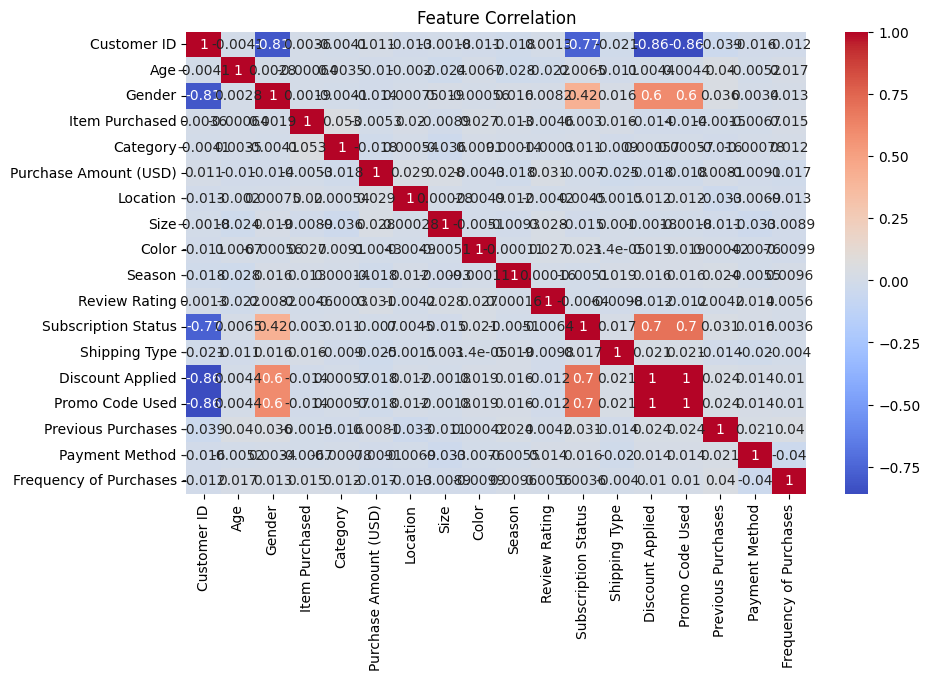

In [ ]:
# Correlation heatmap of numerical features
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


Customer Segments(PCA and Clustering)

In [ ]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

print("Cluster column added successfully!")


Cluster column added successfully!


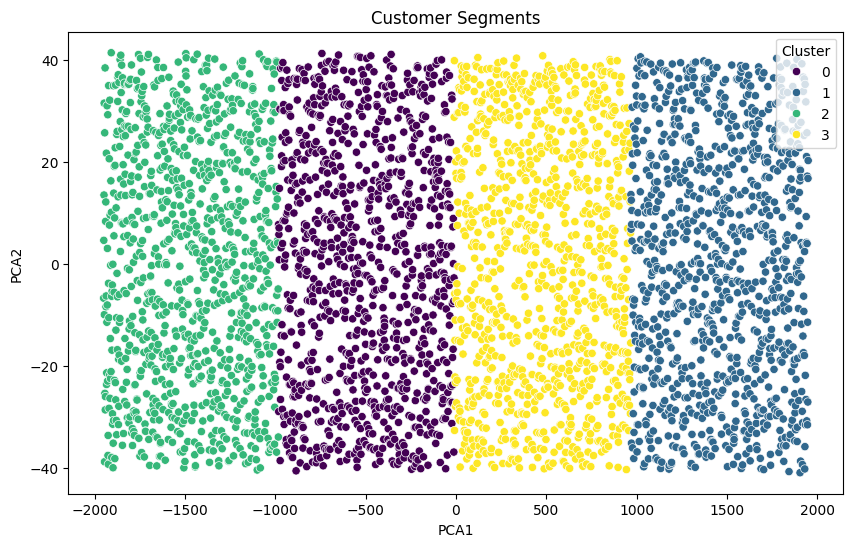

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()


Cluster Distribution

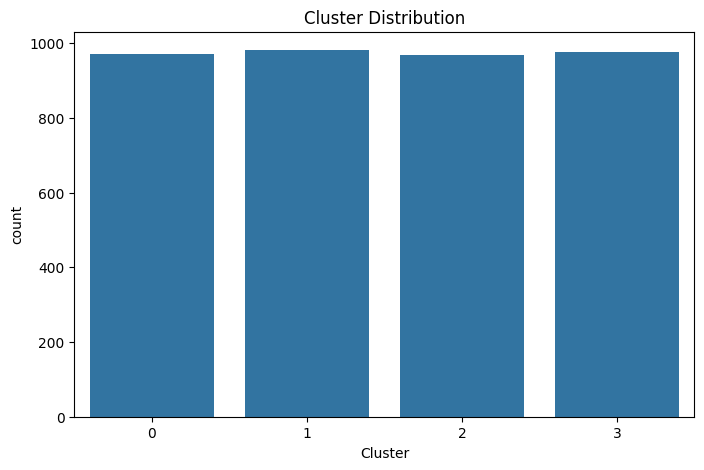

In [ ]:
# Count plot showing the distribution of clusters
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution')
plt.savefig("/content/drive/MyDrive/L&T Data Engineering in python/Cluster_Distribution.jpg")  # Save the plot as an image
plt.show()


Age Distribution by Gender

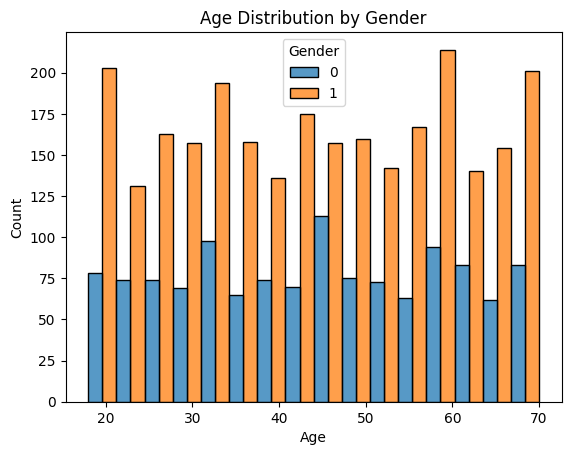

In [ ]:
# Histogram showing age distribution by gender
import seaborn as sns
sns.histplot(data=df, x='Age', hue='Gender', multiple='dodge')
plt.title('Age Distribution by Gender')
plt.show()


Age Distribution by (Single Variable)

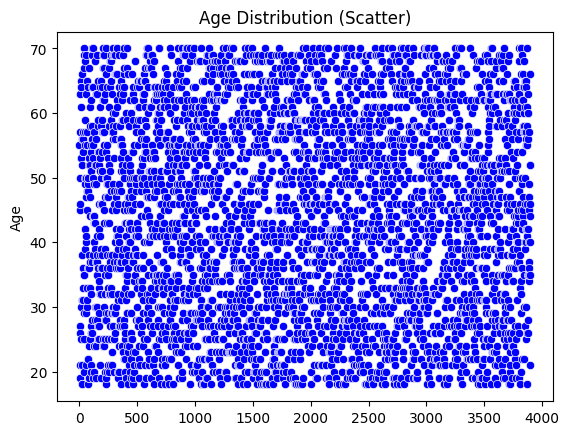

In [ ]:
# Scatter plot for Age distribution
sns.scatterplot(df['Age'], color='blue')
plt.title('Age Distribution (Scatter)')
plt.show()


Bar Plot for Age

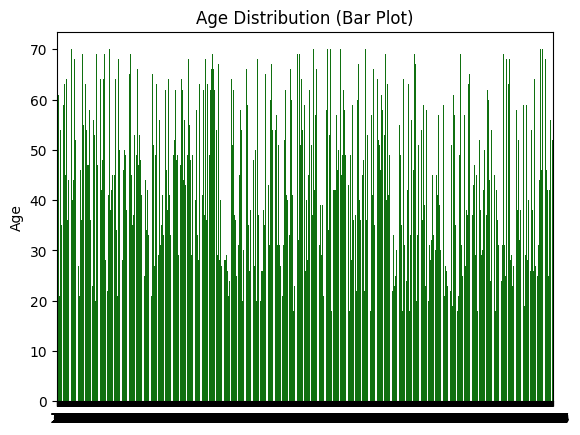

In [ ]:
# Bar plot showing Age distribution
sns.barplot(df['Age'], color='green')
plt.title('Age Distribution (Bar Plot)')
plt.show()


Age vs. Season by Gender

<ipython-input-72-a0cb915d1155>:2: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.




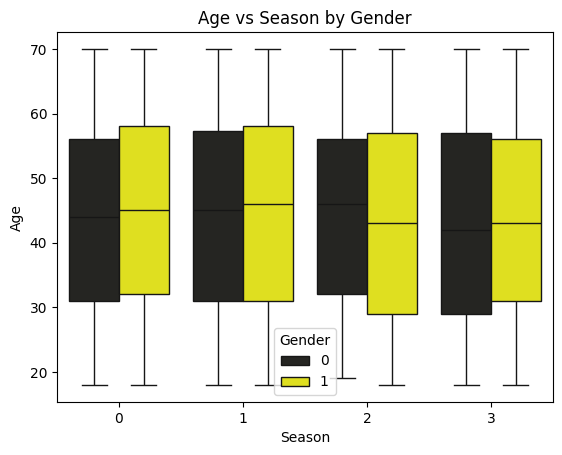

In [ ]:
# Boxplot showing Age by Season and Gender
sns.boxplot(x='Season', y='Age', hue='Gender', data=df, color='yellow')
plt.title('Age vs Season by Gender')
plt.show()


PCA Components (Interactive Visualization)

In [ ]:
import plotly.express as px

# Recalculate PCA and add components to the DataFrame
pca = PCA(n_components=2)
numerical_columns = df.select_dtypes(include=['number']).columns
principal_components = pca.fit_transform(df[numerical_columns])
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

# Interactive scatter plot for clusters
fig = px.scatter(df, x='PCA1', y='PCA2', color='Cluster',
                 title="Customer Segments",
                 labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})
fig.show()


Cluster Distribution (Interactive Pie Chart)

In [ ]:
# Interactive pie chart for cluster distribution
fig_pie = px.pie(df, names='Cluster', title="Cluster Distribution")
fig_pie.show()


Distribution of Numerical Columns

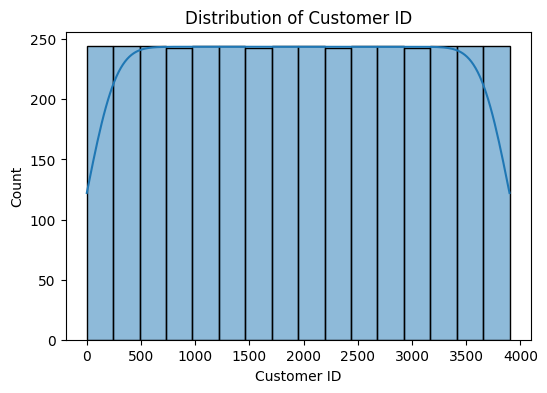

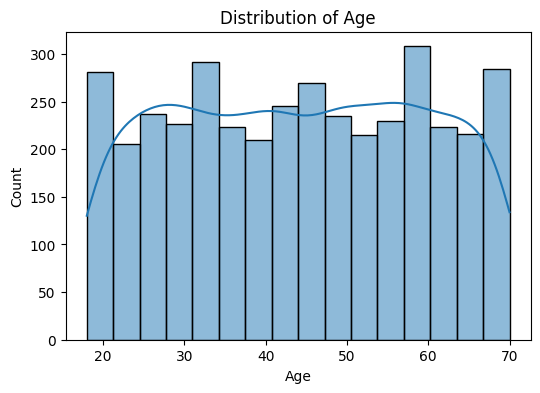

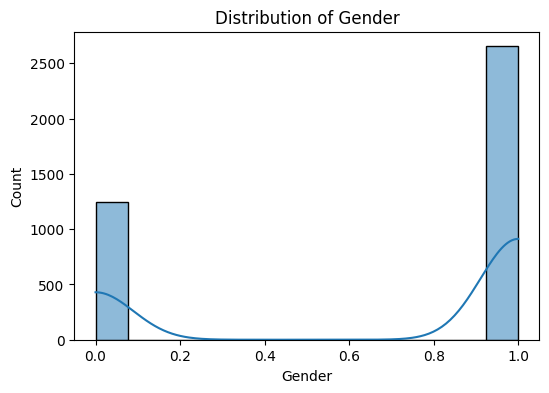

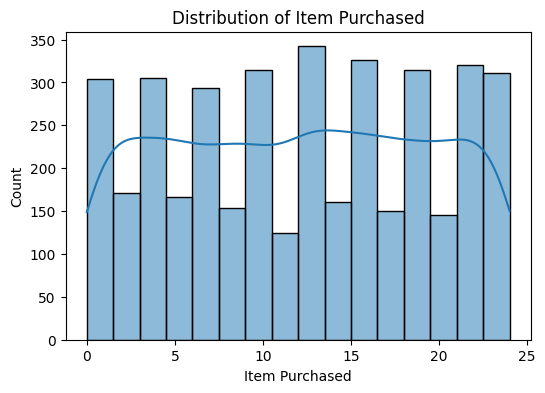

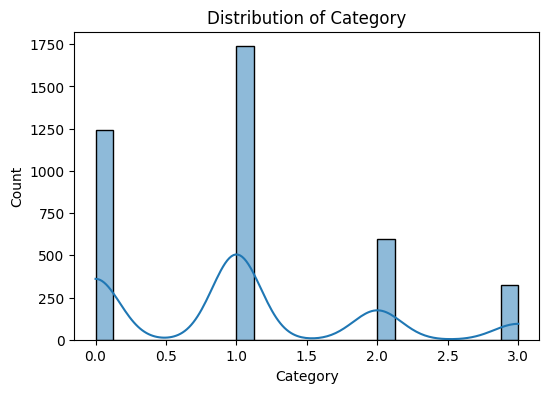

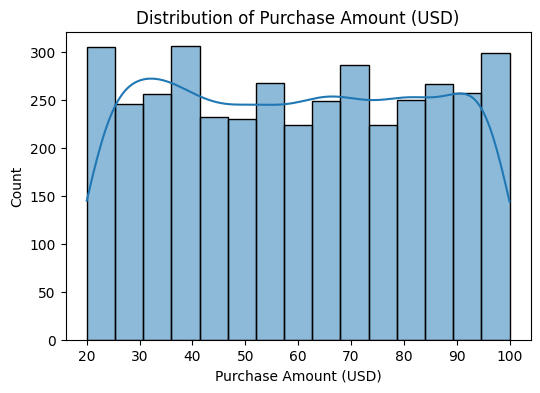

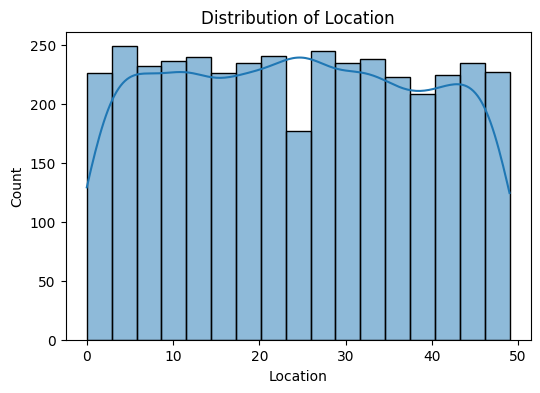

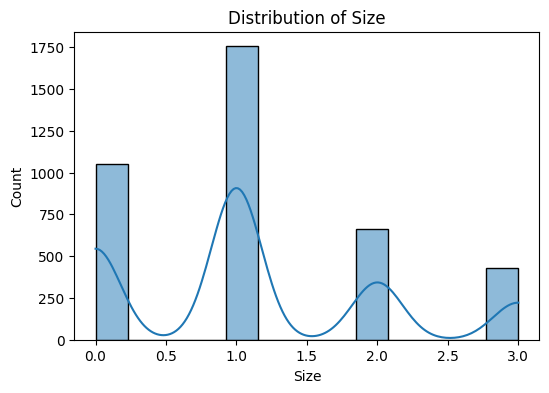

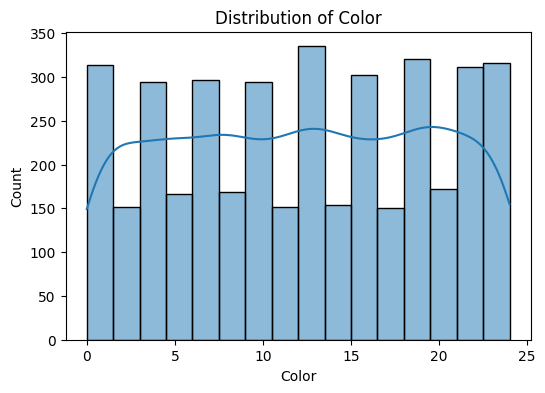

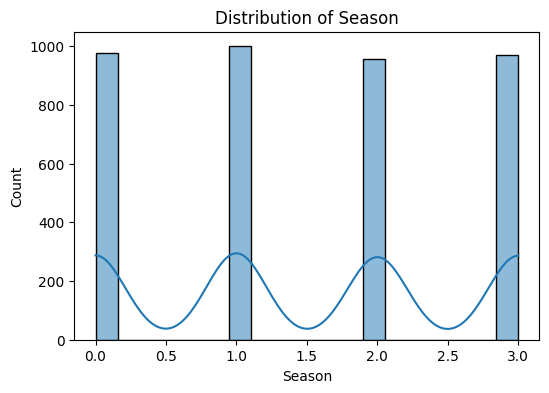

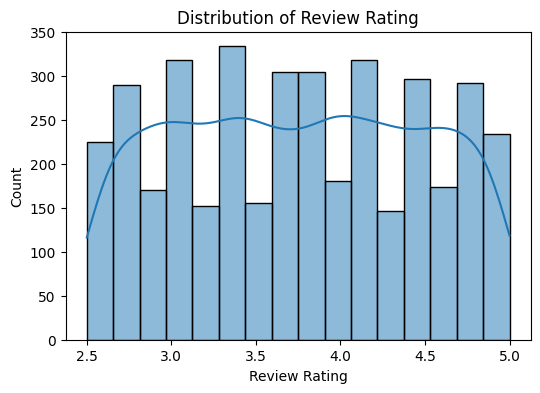

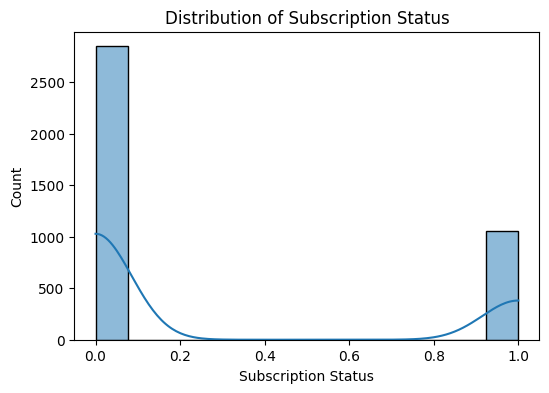

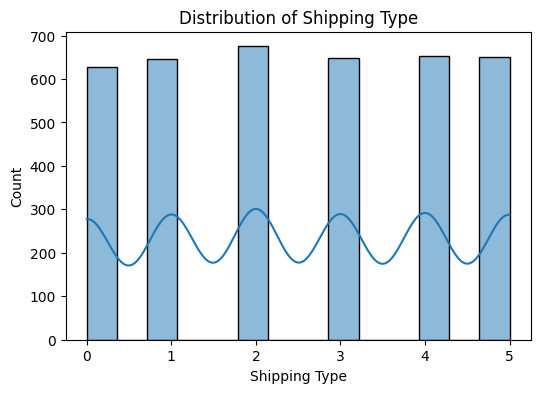

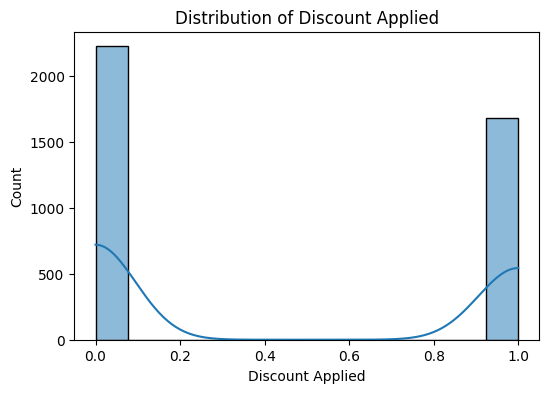

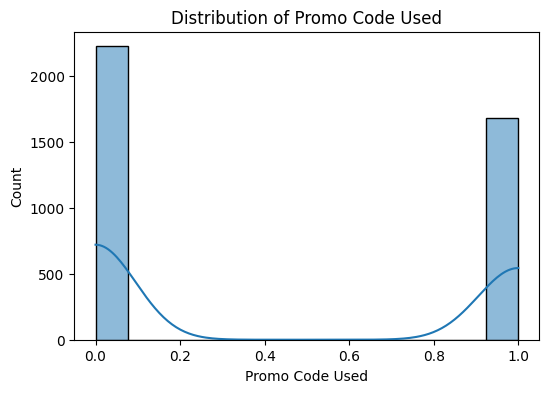

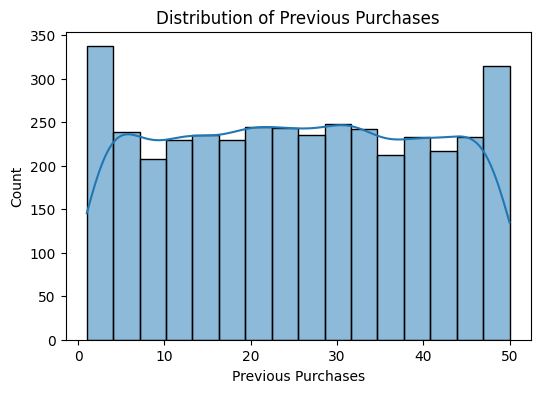

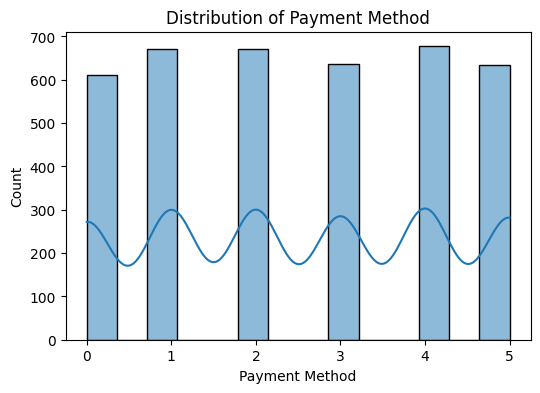

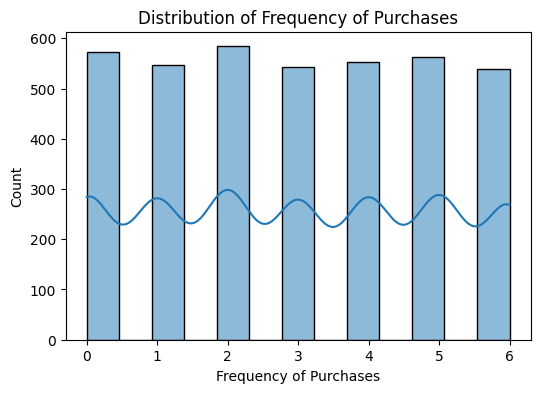

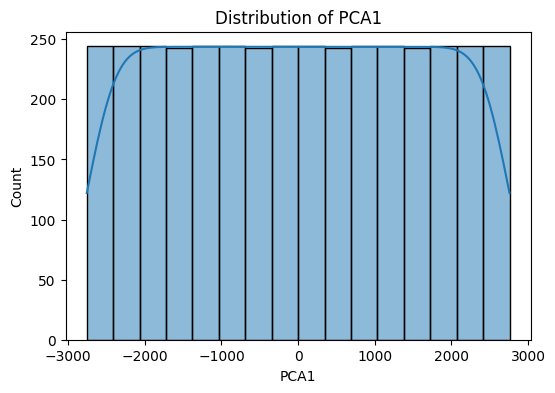

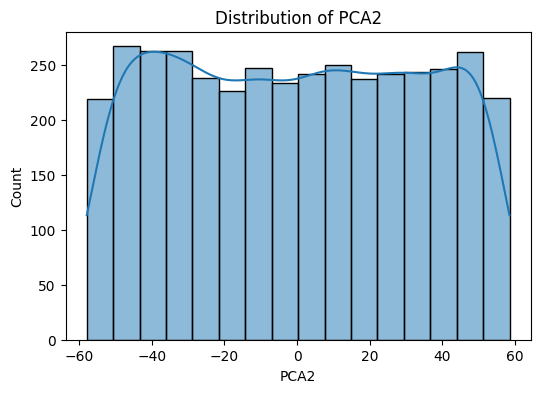

In [ ]:
# Distribution of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


**5. Data Preprocessing**

Handiling Missing Values

In [ ]:
# Identify numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for non-numeric columns with the mode
for col in non_numeric_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for remaining missing values
print("Missing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


<ipython-input-35-6ab8c88a3608>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Encoding Categorical Variables

In [ ]:
# Identify categorical columns and apply label encoding
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Feature engineering

In [ ]:
# Feature engineering: Create new feature if applicable
if 'Number_of_Purchases' in df.columns and 'Average_Spending' in df.columns:
    df['Total_Purchase_Value'] = df['Number_of_Purchases'] * df['Average_Spending']

In [ ]:
# Define target and features
target = 'Item Purchased'  # Replace with actual target column name
X = df.drop([target, 'Cluster', 'PCA1', 'PCA2'], axis=1, errors='ignore')
y = df[target]

In [ ]:
# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

Splitting the Data

In [ ]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Balancing the Dataset

In [ ]:
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

**6. Handling Class Imbalance (Using SMOTE)**




In [79]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


**7. Logistic Regression Model**

Model Training

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=500, random_state=42, solver='liblinear')

Model Evaluation

In [ ]:
# Predictions and evaluation for Logistic Regression
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log, zero_division=0))
print("\nLogistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.15982905982905982

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.12      0.13        41
           1       0.17      0.15      0.16        53
           2       0.04      0.05      0.04        42
           3       0.20      0.20      0.20        46
           4       0.52      0.62      0.57        42
           5       0.11      0.12      0.11        51
           6       0.06      0.08      0.07        38
           7       0.13      0.10      0.11        51
           8       0.16      0.14      0.15        49
           9       0.09      0.09      0.09        43
          10       0.64      0.56      0.60        52
          11       0.09      0.16      0.11        44
          12       0.17      0.21      0.19        42
          13       0.03      0.02      0.02        56
          14       0.28      0.32      0.30        50
          15       0.09      0.09      0

**8. Decision Tree Model**

Model Training

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(max_depth=3, random_state=42)

Model Evaluation

In [ ]:
# Predictions and evaluation for Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.15042735042735042

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.85      0.19        41
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        42
           3       0.25      1.00      0.40        46
           4       0.45      1.00      0.62        42
           5       0.00      0.00      0.00        51
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        51
           8       0.38      0.06      0.11        49
           9       0.00      0.00      0.00        43
          10       0.00      0.00      0.00        52
          11       0.10      0.61      0.17        44
          12       0.11      0.10      0.10        42
          13       0.00      0.00      0.00        56
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        

Visualization

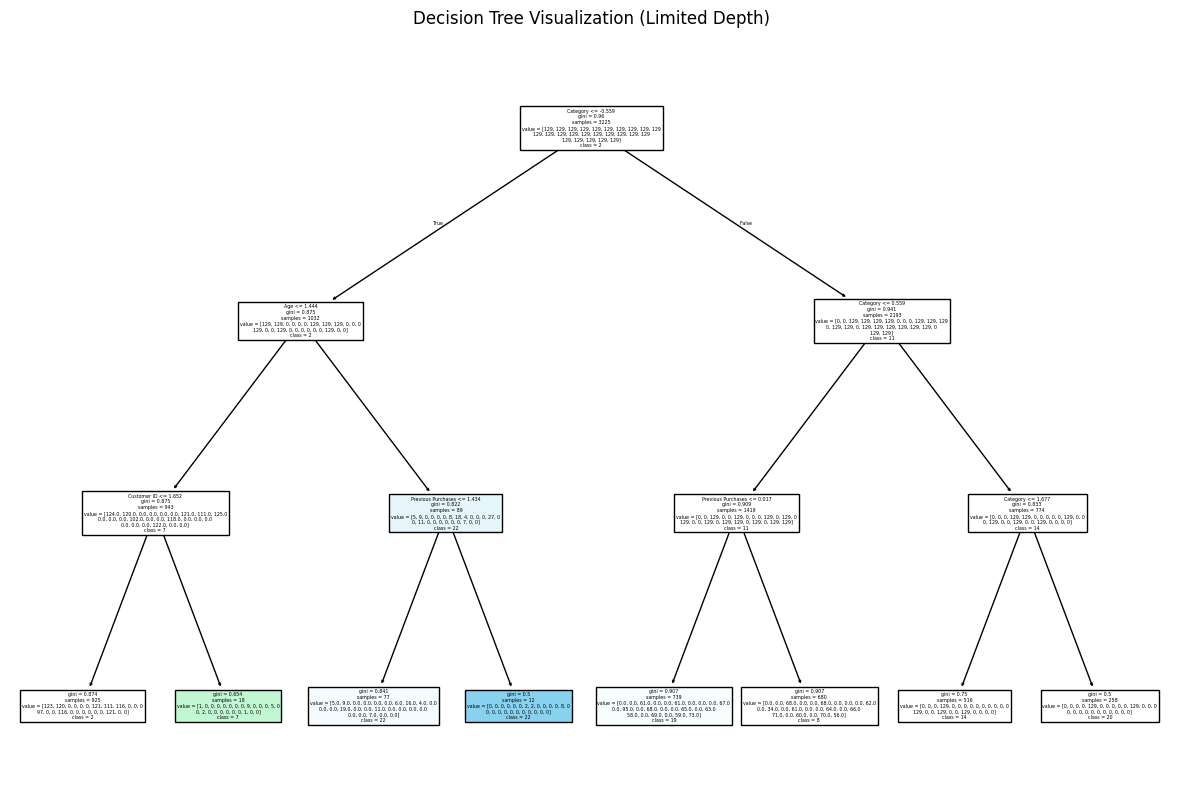

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=y.unique().astype(str))
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

**9. Random Forest Model**

Model Training

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

Model Evaluation

In [ ]:
# Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 0.1658119658119658

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.15      0.13        41
           1       0.02      0.02      0.02        53
           2       0.06      0.10      0.07        42
           3       0.27      0.30      0.29        46
           4       0.49      0.55      0.52        42
           5       0.12      0.14      0.13        51
           6       0.10      0.13      0.11        38
           7       0.14      0.14      0.14        51
           8       0.20      0.18      0.19        49
           9       0.07      0.07      0.07        43
          10       0.60      0.54      0.57        52
          11       0.10      0.11      0.11        44
          12       0.12      0.14      0.13        42
          13       0.17      0.14      0.16        56
          14       0.22      0.22      0.22        50
          15       0.11      0.09      0.10        4

**10. XGBoost Model**

Model Training

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[16:44:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Model Evaluation

In [ ]:
# Predictions and evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=0))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.1717948717948718

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.12      0.12        41
           1       0.15      0.11      0.13        53
           2       0.08      0.12      0.10        42
           3       0.33      0.28      0.30        46
           4       0.48      0.55      0.51        42
           5       0.16      0.14      0.15        51
           6       0.14      0.18      0.16        38
           7       0.17      0.20      0.18        51
           8       0.25      0.22      0.24        49
           9       0.08      0.09      0.08        43
          10       0.59      0.52      0.55        52
          11       0.12      0.11      0.12        44
          12       0.13      0.14      0.14        42
          13       0.13      0.11      0.12        56
          14       0.28      0.36      0.32        50
          15       0.13      0.13      0.13        45
          

**11. Feature Importance**


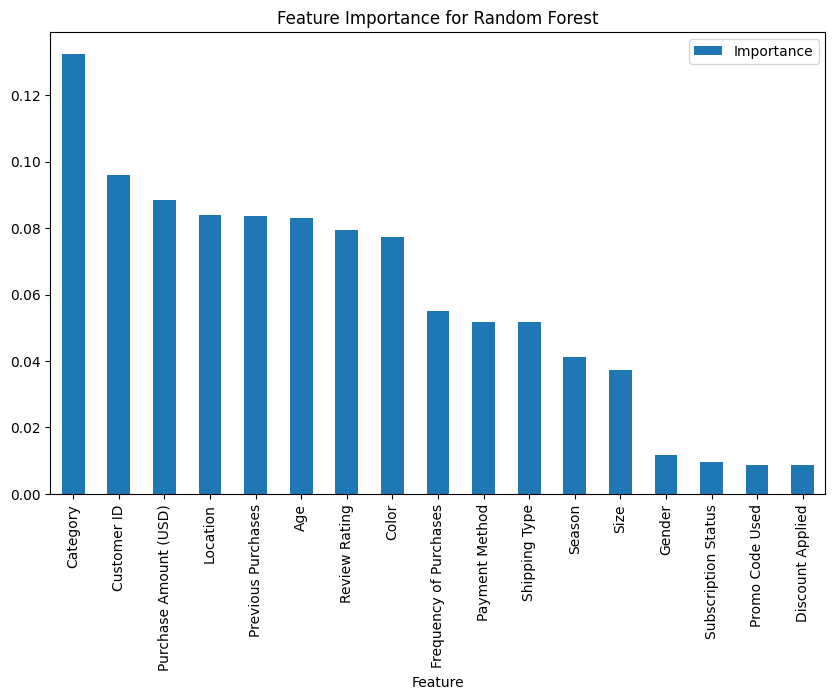

In [80]:
# For Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Feature Importance for Random Forest')
plt.show()


**12. ROC Curve**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC for Logistic Regression (Multi-class case)
y_proba_log = log_reg.predict_proba(X_test)  # Probability estimates for all classes
roc_auc = roc_auc_score(y_test, y_proba_log, multi_class='ovr')  # 'ovr' or 'ovo'

print(f"Multi-class ROC-AUC (Logistic Regression): {roc_auc:.2f}")


Multi-class ROC-AUC (Logistic Regression): 0.80


Binary ROC Curve

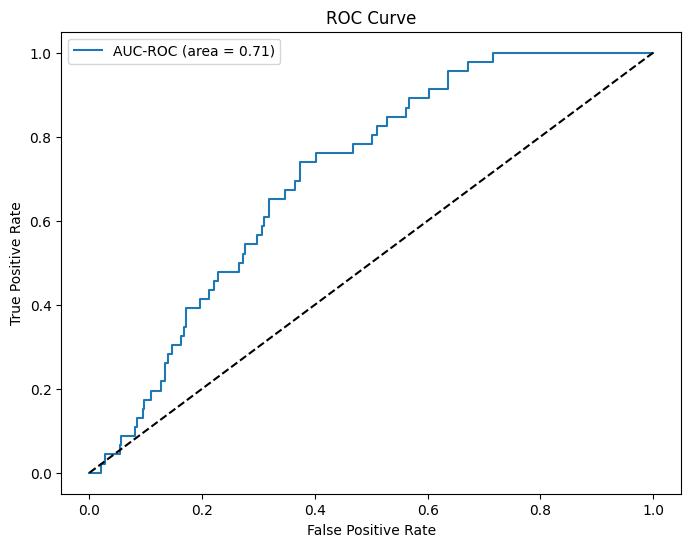

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Multi-class ROC Curve

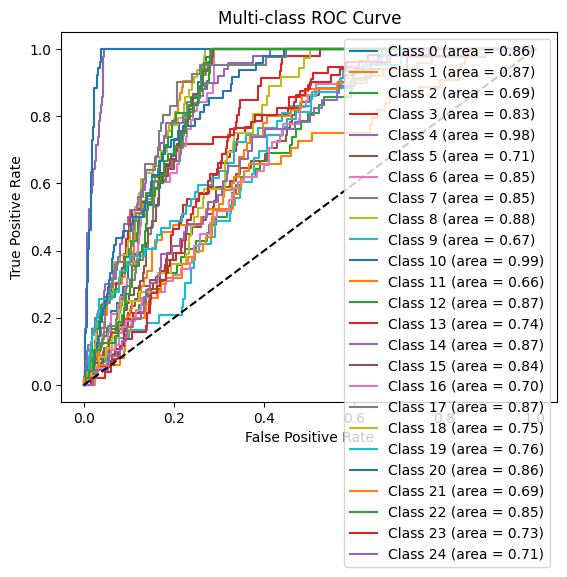

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_log[:, i])
    roc_auc = roc_auc_score(y_test_binarized[:, i], y_proba_log[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="best")
plt.show()


**13. Cross-Validation**



In [81]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg, X_train_balanced, y_train_balanced, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cv_scores}")


Logistic Regression Cross-Validation Scores: [0.17054264 0.16124031 0.17984496 0.17209302 0.2248062 ]


**13. Model Comparison**


Model Comparison:
                      Accuracy
Logistic Regression  0.159829
Decision Tree        0.150427
Random Forest        0.165812
XGBoost              0.171795


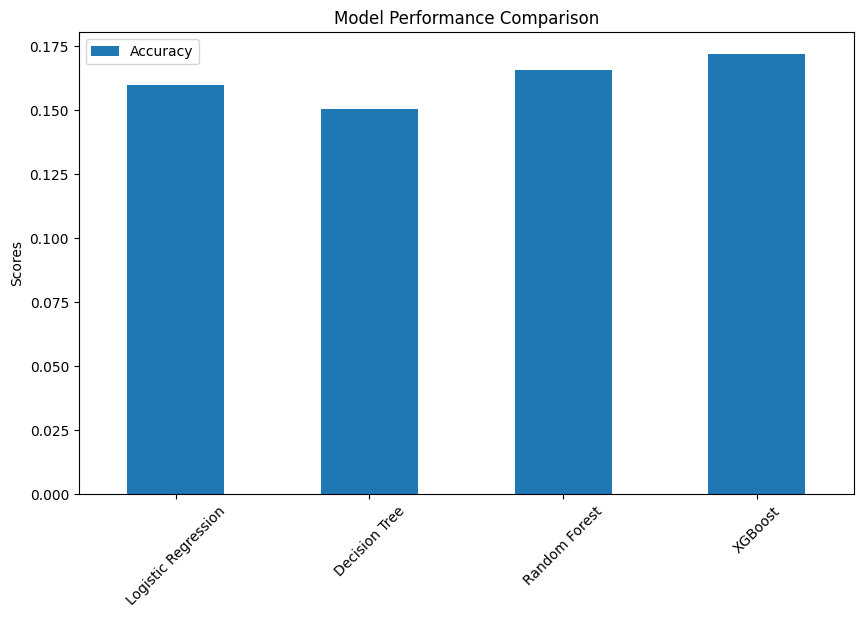

In [ ]:
# Model Comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ]
}
comparison_df = pd.DataFrame(metrics, index=models)
print("\nModel Comparison:\n", comparison_df)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()

**14. Hyperparameter Tuning**

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}


**The End**